# Long-Short Term Memory (LSTM) time series analysis

In [16]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from tsf.windows.static import SimpleAR
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.rcParams['figure.dpi'] = 150

# Data input

In [2]:
# Raw data
BTC = pd.read_csv('../data/bitcoin.csv', index_col='Date', parse_dates=True)
BTC_train = pd.read_csv('../data/bitcoin_train.csv', index_col='Date', parse_dates=True)
BTC_test  = pd.read_csv('../data/bitcoin_test.csv', index_col='Date', parse_dates=True)

ETH = pd.read_csv('../data/ethereum.csv', index_col='Date', parse_dates=True)
ETH_train = pd.read_csv('../data/ethereum_train.csv', index_col='Date', parse_dates=True)
ETH_test  = pd.read_csv('../data/ethereum_test.csv', index_col='Date', parse_dates=True)

# Series
BTC_serie = BTC[['Adj Close']]
BTC_train_serie = BTC_train[['Adj Close']]
BTC_test_serie = BTC_test[['Adj Close']]

ETH_serie = ETH[['Adj Close']]
ETH_train_serie = ETH_train[['Adj Close']]
ETH_test_serie = ETH_test[['Adj Close']]

# Log10
BTC_train_log10 = np.log10(BTC_train_serie)
BTC_test_log10  = np.log10(BTC_test_serie)

ETH_train_log10 = np.log10(ETH_train_serie)
ETH_test_log10  = np.log10(ETH_test_serie)

# Datetime indexs
BTC_index = BTC.index
BTC_train_index = BTC_train.index
BTC_test_index = BTC_test.index

ETH.index = ETH.index
ETH_train_index = ETH_train.index
ETH_test_index = ETH_test.index

# LSTM Model
Las redes LSTM reciben una matrix 3D como entrada: (batch_size, timesteps, dim)

    · batch_size: Número de ejemplos
    · timesteps: Longitud de series temporales (p)
    · dim: Dimensión de la serie temporal, para series univiantes, dim=1
    

## Bitcoin prices

In [3]:
# Data scaler
scaler = MinMaxScaler().fit(BTC_train_log10.values)

scaled_BTC_train_log10 = scaler.transform(BTC_train_log10.values)
scaled_BTC_test_log10  = scaler.transform(BTC_test_log10.values)

In [8]:
# Create matrixs with p past values for each timestep
p = 30

# Train
X_train = SimpleAR(p).transform(X=[], y=scaled_BTC_train_log10.flatten())
y_train = SimpleAR(p).offset_y(X=X_train, y=scaled_BTC_train_log10.flatten())

# Test
X_test = SimpleAR(p).transform(X=[], y=scaled_BTC_test_log10.flatten())
y_test = SimpleAR(p).offset_y(X=X_test, y=scaled_BTC_test_log10.flatten())

# Concatenate p last days of train to beginning of test
X_test = np.concatenate((X_train[-30:,], X_test), axis=0)
y_test = np.concatenate((y_train[-30:], y_test))

In [9]:
# Reshape to 3D array with 1 dimension
dim = 1

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], dim))
X_test  = X_test.reshape((X_test.shape[0], X_test.shape[1], dim))

In [10]:
# Configure model
model = Sequential()
model.add(LSTM(units=256, return_sequences=True, activation= 'relu', input_shape=(p, dim)))
model.add(LSTM(units=256))
#model.add(Dropout(rate=0.1))
model.add(Dense(units=1,  activation= 'linear'))

model.compile(optimizer= 'adam', loss= 'mse')


In [11]:
# Fit model
model.fit(x=X_train,
          y=y_train,
          batch_size=15,
          epochs=150,
validation_split=0.05)

Train on 866 samples, validate on 46 samples
Epoch 1/150
866/866 [==============================] - 12s 14ms/step - loss: 0.0210 - val_loss: 0.0024
Epoch 2/150
866/866 [==============================] - 10s 11ms/step - loss: 6.9076e-04 - val_loss: 7.5332e-04
Epoch 3/150
866/866 [==============================] - 9s 10ms/step - loss: 6.4294e-04 - val_loss: 0.0019
Epoch 4/150
866/866 [==============================] - 8s 10ms/step - loss: 6.0761e-04 - val_loss: 0.0022
Epoch 5/150
866/866 [==============================] - 9s 10ms/step - loss: 5.6851e-04 - val_loss: 0.0016
Epoch 6/150
866/866 [==============================] - 8s 10ms/step - loss: 5.9475e-04 - val_loss: 0.0011
Epoch 7/150
866/866 [==============================] - 8s 10ms/step - loss: 5.9780e-04 - val_loss: 0.0018
Epoch 8/150
866/866 [==============================] - 8s 10ms/step - loss: 6.0956e-04 - val_loss: 0.0019
Epoch 9/150
866/866 [==============================] - 9s 10ms/step - loss: 6.9528e-04 - val_loss: 0.0015

Epoch 75/150
866/866 [==============================] - 8s 9ms/step - loss: 2.2790e-04 - val_loss: 3.0205e-04
Epoch 76/150
866/866 [==============================] - 9s 10ms/step - loss: 2.3503e-04 - val_loss: 3.8343e-04
Epoch 77/150
866/866 [==============================] - 9s 10ms/step - loss: 2.7733e-04 - val_loss: 6.5636e-04
Epoch 78/150
866/866 [==============================] - 9s 10ms/step - loss: 3.1262e-04 - val_loss: 2.1018e-04
Epoch 79/150
866/866 [==============================] - 8s 10ms/step - loss: 1.8344e-04 - val_loss: 4.7452e-04
Epoch 80/150
866/866 [==============================] - 8s 9ms/step - loss: 2.1687e-04 - val_loss: 2.4065e-04
Epoch 81/150
866/866 [==============================] - 8s 10ms/step - loss: 1.8660e-04 - val_loss: 3.4869e-04
Epoch 82/150
866/866 [==============================] - 8s 10ms/step - loss: 1.9063e-04 - val_loss: 2.7507e-04
Epoch 83/150
866/866 [==============================] - 9s 10ms/step - loss: 1.5997e-04 - val_loss: 2.2105e-04
Epo

Epoch 148/150
866/866 [==============================] - 17s 19ms/step - loss: 1.7397e-04 - val_loss: 2.3995e-04
Epoch 149/150
866/866 [==============================] - 16s 19ms/step - loss: 1.9748e-04 - val_loss: 5.5714e-04
Epoch 150/150
866/866 [==============================] - 15s 18ms/step - loss: 1.6433e-04 - val_loss: 2.3138e-04


In [12]:
# Predict train and test
scaled_train_predictions = model.predict(X_train)
scaled_test_predictions  = model.predict(X_test)

In [13]:
X_train.shape

(912, 30, 1)

In [14]:
# Undo transformation
train_predictions = scaler.inverse_transform(scaled_train_predictions)
test_predictions = scaler.inverse_transform(scaled_test_predictions)

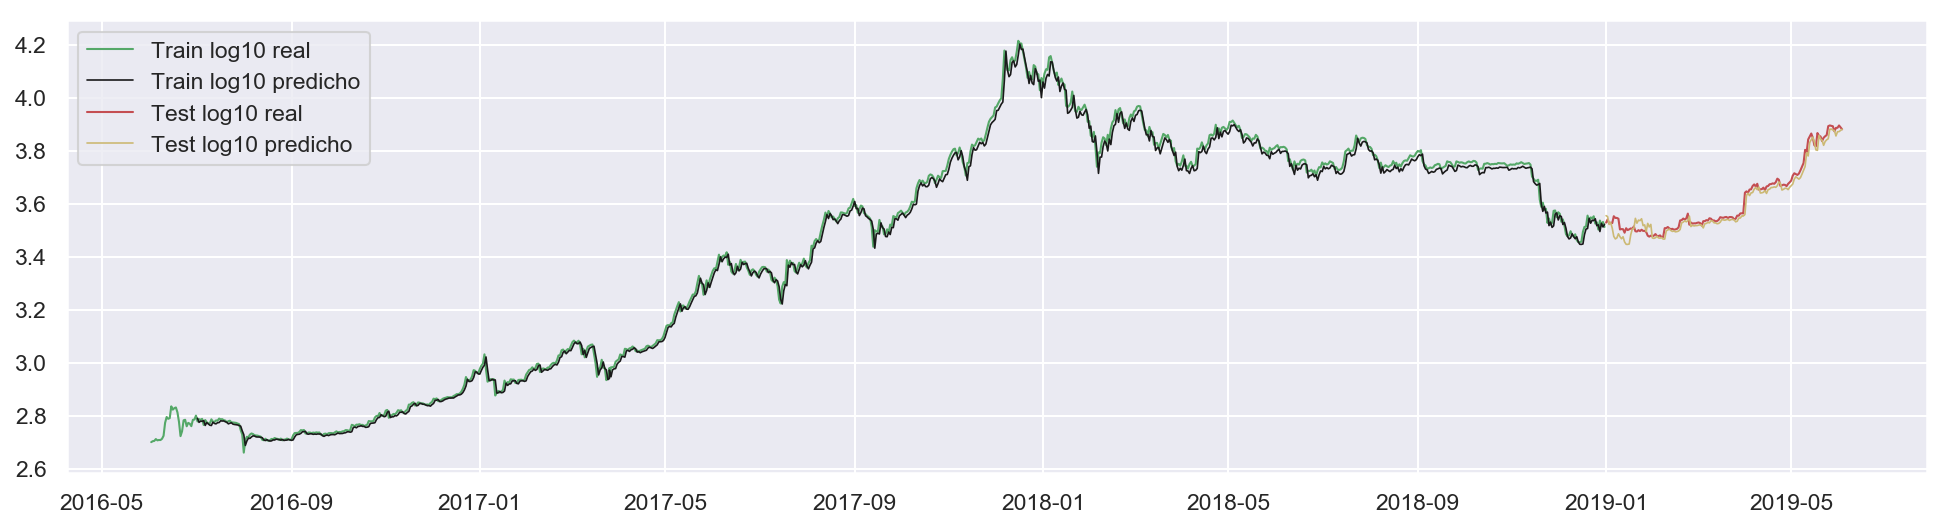

In [17]:
# Plot results

train_offset = len(BTC_train_log10.values.flatten()) - len(train_predictions)
test_offset  = len(BTC_test_log10.values.flatten()) - len(test_predictions)

plt.figure(figsize=(16, 4))
plt.plot(BTC_train_index, BTC_train_log10, color='g', linewidth=1)
plt.plot(BTC_train_index[train_offset:], train_predictions, color='k', linewidth=0.8, linestyle='-')
plt.plot(BTC_test_index, BTC_test_log10, color='r', linewidth=1)
plt.plot(BTC_test_index[test_offset:], test_predictions, color='y', linewidth=0.8, linestyle='-')

plt.legend(['Train log10 real', 'Train log10 predicho', 'Test log10 real', 'Test log10 predicho'])
plt.show()